In [1]:
import numpy as np
import seaborn as sns
from rich import print, inspect, traceback, pretty
import pandas as pd
from time import time

from fast_mutual_information import mind

from chaotic_carbon_networks.preprocessing import concat_airs_data
from chaotic_carbon_networks.anomaly_correction import anomaly_correction_month
from chaotic_carbon_networks.hex import hexgrid

sns.set_theme(context='paper', style="whitegrid", palette="Set2", font_scale=1.5, rc={'figure.figsize':(9,6)})
pretty.install()
traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f72c3a4e1d0>>

In [2]:
np.arange(-240, -6, 24)

array([-240, -216, -192, -168, -144, -120,  -96,  -72,  -48,  -24])

In [3]:
T = np.arange(-240, -6, 24)
H = [1]
B = np.arange(16, 129, 16)

co2_orig = concat_airs_data()["co2_vmr_uppertrop"].sel(orbit_pass="13:30:00")
co2_orig = anomaly_correction_month(co2_orig)

res = []
for h in H:
    co2_hex = hexgrid(co2_orig, method="mean", hex_res=h)
    for t in T:
        # Only select last 24 months
        co2 = co2_hex.isel(time=slice(t, None))
        for b in B:
            st = time()
            mi = mind(co2.values, co2.values, b)
            res.append({"T": t, "H": h, "B": b, "Time": time()-st})
df = pd.DataFrame(res)
df

Loading cached data from /home/tobias/Repositories/chaotic-carbon-networks/data/aqua-airs/cache/aqua_airs_concat.nc

,T,H,B,Time
0,-240,1,16,0.160219
1,-240,1,32,0.221579
2,-240,1,48,0.280775
3,-240,1,64,0.349964
4,-240,1,80,0.457681
...,...,...,...,...
75,-24,1,64,0.216224
76,-24,1,80,0.292364
77,-24,1,96,0.382987
78,-24,1,112,0.551730


<Axes: xlabel='T', ylabel='Time'>

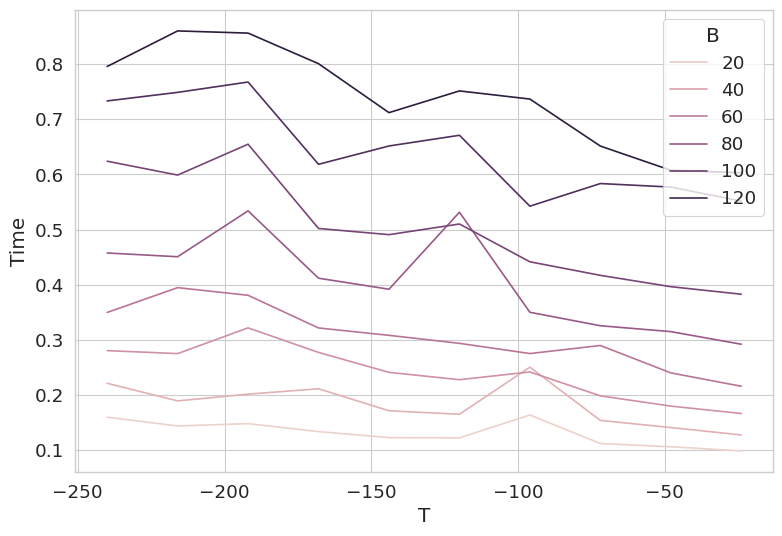

In [6]:
sns.lineplot(data=df[df["H"] == 1], x="T", y="Time", hue="B")

<Axes: xlabel='B', ylabel='Time'>

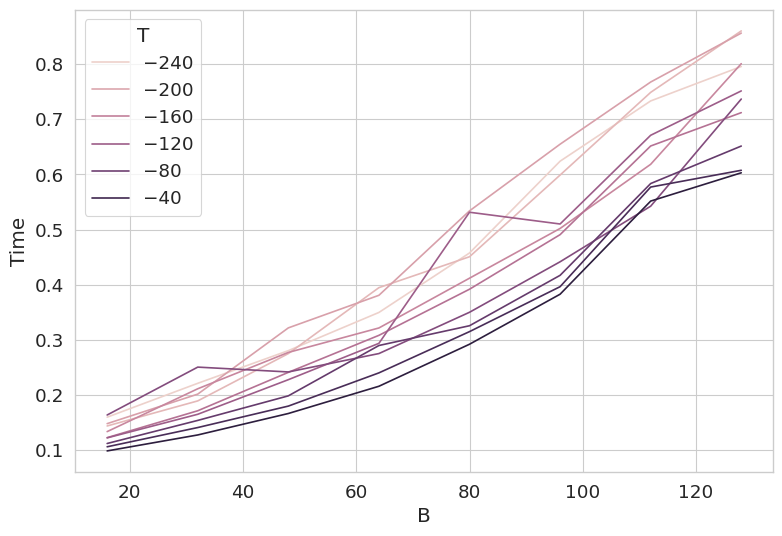

In [7]:
sns.lineplot(data=df[df["H"] == 1], x="B", y="Time", hue="T")